# Single-layer perceptron network for number classification from zero to nine

## Imports
Code section that contains all the necessary imports for the full execution of the prediction algorithm.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Activation function
Perceptron activation function called “step function”.

In [ ]:
# Activation (function step) and training function
def step_function(x):
    return np.where(x >= 0, 1, 0)

## Prediction function
Function to make predictions by evaluating the activation function by the “net”.

In [ ]:
# Function for making predictions(output)
def perceptron_predict(X, weights):
    return step_function(np.dot(X, weights[1:]) + weights[0])

## Training function
Training of the perceptron by means of modifications of the different weights and storage of the total errors of each iteration for each epoch. At the end, the execution of the code is stopped when the total error is zero, in order to avoid iterations or epochs in spite of having already obtained the desired learning.  

In [ ]:
# Perceptron algorithm
def perceptron_train(X, y, learning_rate=0.1, epochs=100):
    # Initialize weights (one more for bias)
    weights = np.random.rand(X.shape[1] + 1, y.shape[1])

    # Error vector
    errors = []

    # Training
    for _ in range(epochs):
        total_error = 0

        for xi, target in zip(X, y):
            # Calculate output(Prediction)
            output = perceptron_predict(xi, weights)

            # Calculate the absolute error
            error = target - output

            total_error += sum(abs(error))

            # Update weights
            update = learning_rate * error
            weights[1:] += np.outer(xi, update)
            weights[0] += update

        errors.append(total_error)

        # Break code execution with a total error equal to zero
        if total_error == 0:
            break

    return weights, errors

## Input data, output data and training
The input (binary numbers represented by bit strings in a 5x3 matrix) and output data are stored in variables for further processing in the perceptron and their respective training.

In [ ]:
# Prepare input and output data
# Input data for numbers 0-9
X = np.array([[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1], #0
              [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], #1
              [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], #2
              [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], #3
              [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], #4
              [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], #5
              [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], #6
              [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], #7
              [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], #8
              [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]]) #9

# Output data for numbers 0-9
y = np.array([[0, 0, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 1, 1],
              [0, 1, 0, 0],
              [0, 1, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 1]])

# Training the perceptron
weights, errors = perceptron_train(X, y, learning_rate=0.1, epochs=80)

print(f"Weights: {weights}")
print(f"Errors: {errors}")

Weights: [[-1.26118613e+00  1.64969869e-01  2.31959410e-01  2.87231431e-01]
 [-7.48968778e-01  3.17135261e-01  4.79847065e-01  1.88937547e-02]
 [-1.32698916e-01 -2.28395803e-01 -1.12034025e-02  5.91132944e-01]
 [-3.55853960e-01  5.77762845e-01  4.47194662e-01 -5.76830291e-01]
 [ 9.29862408e-01  1.04550679e-02 -1.67301836e+00 -2.88119162e-01]
 [-2.91620505e-01  1.79228360e-01  5.15943143e-02  2.44215015e-01]
 [ 3.58498124e-01 -1.46358716e+00 -5.40774316e-01  1.05719645e-01]
 [-4.01704828e-01  5.32395334e-01 -2.84969414e-02  1.32317790e-01]
 [ 1.46649729e+00 -3.34343727e-01  2.28370260e-01 -4.94682159e-02]
 [-1.57394129e-01  2.39149824e-01  1.91928619e-01  3.16399978e-01]
 [ 2.77412124e-01 -4.19604479e-01  3.65237724e-01 -7.28941376e-01]
 [-8.69650018e-01  1.98932817e-01  1.37102877e-01  4.12441800e-01]
 [ 6.88461519e-01  8.56642959e-01 -1.54440046e-01  2.25821505e-01]
 [ 6.88414281e-01 -4.67055340e-01  4.71446733e-02 -1.93599890e-04]
 [-3.42456447e-01 -5.96965013e-01  4.80957017e-01  3.

## Overall error graph
Graph of the global error taking into account a total sum of each error within each of the iterated epochs.

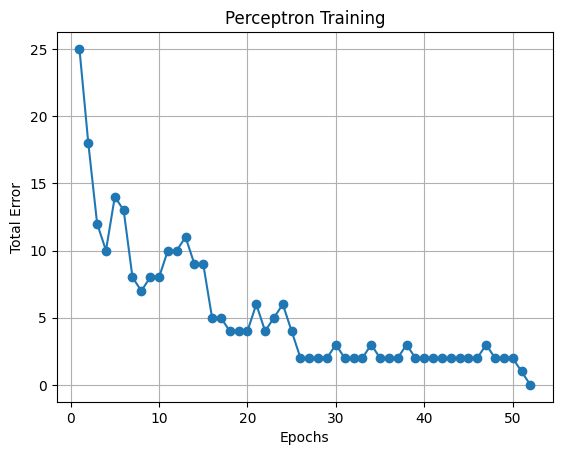

In [ ]:
# Graphing the global error in each epoch
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Perceptron Training")
plt.grid(True)
plt.show()

## Validation of predictions
The predictions are validated with the previously stated inputs for the training of the same perceptron and the weights already modified to arrive at this learning.

In [ ]:
# Testing the perceptron with the input data
for xi in X:
    prediction = perceptron_predict(xi, weights)

    print(f"Input: {xi} - Prediction: {prediction}")

Input: [1 1 1 1 0 1 1 0 1 1 0 1 1 1 1] - Prediction: [0 0 0 0]
Input: [0 1 0 1 1 0 0 1 0 0 1 0 0 1 0] - Prediction: [0 0 0 1]
Input: [1 1 1 0 0 1 1 1 1 1 0 0 1 1 1] - Prediction: [0 0 1 0]
Input: [1 1 1 0 0 1 1 1 1 0 0 1 1 1 1] - Prediction: [0 0 1 1]
Input: [1 0 1 1 0 1 1 1 1 0 0 1 0 0 1] - Prediction: [0 1 0 0]
Input: [1 1 1 1 0 0 1 1 1 0 0 1 1 1 1] - Prediction: [0 1 0 1]
Input: [1 1 1 1 0 0 1 1 1 1 0 1 1 1 1] - Prediction: [0 1 1 0]
Input: [1 1 1 0 0 1 0 0 1 0 0 1 0 0 1] - Prediction: [0 1 1 1]
Input: [1 1 1 1 0 1 1 1 1 1 0 1 1 1 1] - Prediction: [1 0 0 0]
Input: [1 1 1 1 0 1 1 1 1 0 0 1 1 1 1] - Prediction: [1 0 0 1]


## Validation of predictions with unordered data
The predictions are validated with the previously indicated inputs but in decending order for the training of the same perceptron and the weights already modified to arrive at this learning.

In [ ]:
# Input data for numbers in disarray
X_unordered_test = np.array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], #9
                              [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], #8
                              [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], #7
                              [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], #6
                              [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], #5
                              [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], #4
                              [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], #3
                              [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], #2
                              [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], #1
                              [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]]) #0

# Testing the perceptron with input data in disorder
for xi in X_unordered_test:
    prediction = perceptron_predict(xi, weights)

    print(f"Input: {xi} - Prediction: {prediction}")

Input: [1 1 1 1 0 1 1 1 1 0 0 1 1 1 1] - Prediction: [1 0 0 1]
Input: [1 1 1 1 0 1 1 1 1 1 0 1 1 1 1] - Prediction: [1 0 0 0]
Input: [1 1 1 0 0 1 0 0 1 0 0 1 0 0 1] - Prediction: [0 1 1 1]
Input: [1 1 1 1 0 0 1 1 1 1 0 1 1 1 1] - Prediction: [0 1 1 0]
Input: [1 1 1 1 0 0 1 1 1 0 0 1 1 1 1] - Prediction: [0 1 0 1]
Input: [1 0 1 1 0 1 1 1 1 0 0 1 0 0 1] - Prediction: [0 1 0 0]
Input: [1 1 1 0 0 1 1 1 1 0 0 1 1 1 1] - Prediction: [0 0 1 1]
Input: [1 1 1 0 0 1 1 1 1 1 0 0 1 1 1] - Prediction: [0 0 1 0]
Input: [0 1 0 1 1 0 0 1 0 0 1 0 0 1 0] - Prediction: [0 0 0 1]
Input: [1 1 1 1 0 1 1 0 1 1 0 1 1 1 1] - Prediction: [0 0 0 0]


## Validation of predictions with noise data
The predictions are validated with the weights already modified after training and are used with data that are not correctly formatted, so they have noise in the binary representation of the numbers.

In [ ]:
# Input data for numbers 0-9 with noise
X_noise_test = np.array([[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
                          [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])

# Testing the perceptron with the input data having noise
for xi in X_noise_test:
    prediction = perceptron_predict(xi, weights)

    print(f"Input: {xi} - Prediction: {prediction}")

Input: [1 1 1 1 1 1 1 0 1 1 0 1 1 1 1] - Prediction: [0 0 0 0]
Input: [0 1 0 1 1 1 0 1 0 0 1 0 0 1 0] - Prediction: [0 0 0 1]
Input: [1 1 1 0 1 1 1 1 1 1 0 0 1 1 1] - Prediction: [0 0 1 0]
Input: [1 1 1 0 1 1 1 1 1 0 0 1 1 1 1] - Prediction: [0 0 1 1]
Input: [1 1 1 1 0 1 1 1 1 0 0 1 0 0 1] - Prediction: [0 1 0 1]
Input: [1 1 1 1 1 0 1 1 1 0 0 1 1 1 1] - Prediction: [0 1 1 1]
Input: [1 1 1 1 1 0 1 1 1 1 0 1 1 1 1] - Prediction: [0 1 1 0]
Input: [1 1 1 0 1 1 0 0 1 0 0 1 0 0 1] - Prediction: [0 1 1 1]
Input: [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1] - Prediction: [1 0 0 0]
Input: [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1] - Prediction: [0 0 0 1]
